# The midpoint rule

In [49]:
def midpoint(f, a, b, method='mid'):
    n = 1001
    dx = (b-a)/(n-1)
    area = 0
    x = np.linspace(a, b, n)
    for i in range(n-1):
        if method == 'mid':
            point = f((x[i]+x[i+1])/2)
        elif method == 'left':
            point = f(x[i])
        else:
            point = f(x[i+1])
        area += point * dx
    return area

In [50]:
import numpy as np
def f(x):
    return 1 + 0.5*np.sin(1.75*np.pi*x)**2

In [51]:
midpoint(f, 0, 1, 'mid')

1.2727365349793325

# Discrete data

For discrete data, the leftpoint and rightpoint rules can be easily applied. The midpoint rule requires evenly spaced intervals to be able to apply a middle point.

Let's get the worldwide CO2 emissions dataset.

In [85]:
import requests
import zipfile
import os
import pandas as pd

In [86]:
url = 'http://api.worldbank.org/v2/en/indicator/EN.ATM.CO2E.PC?downloadformat=csv'
data = requests.get(url)

In [87]:
with open('climate_data.zip', 'wb') as f:
    f.write(data.content)

In [88]:
z = zipfile.ZipFile('climate_data.zip')
z.extractall(os.getcwd())

In [66]:
os.getcwd()

'/Users/mattwilliams/Documents/GitHubClonedRepos/PythonCFD/NumericalMethods'

In [99]:
df = pd.read_csv(file, header=2)

In [101]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,204.620372,208.822811,226.118079,214.800370,207.615777,185.203957,...,24.507516,13.157722,8.353561,8.410064,8.610374,8.426911,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.406424,0.345149,0.280455,0.253728,0.262556,0.245101,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,...,1.262825,1.361181,1.295075,1.664741,1.240245,1.202861,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.803715,1.697966,1.697279,1.900070,1.602648,1.577163,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,5.867410,5.916884,5.901775,5.832906,5.969786,6.072370,NaN,NaN,NaN,NaN


In [104]:
df_summed = df.iloc[:,4:].sum(axis=0)

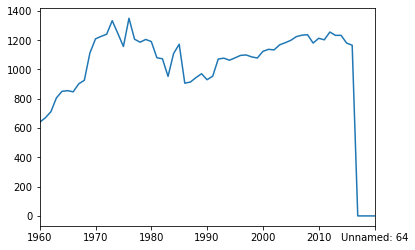

In [106]:
df_summed.plot()

In [110]:
df_summed.drop(['2017','2018','2019','Unnamed: 64'], axis=0, inplace=True)

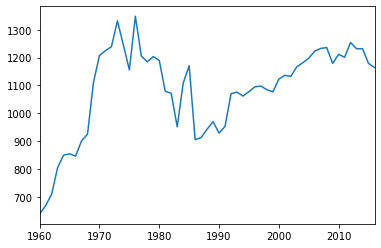

In [111]:
df_summed.plot()

In [112]:
climate_data = df_summed.values

In [113]:
climate_data

array([ 639.02470045,  668.88950821,  710.3976055 ,  805.38441277,
        850.04070265,  854.54630883,  846.55336524,  901.18084011,
        925.34310951, 1111.84979786, 1207.70303189, 1224.95656644,
       1239.30991562, 1331.88356756, 1245.08329695, 1155.94905625,
       1348.52263407, 1205.48692859, 1185.03540788, 1203.87820622,
       1189.58611333, 1079.15118884, 1071.8872456 ,  951.59580221,
       1108.31927053, 1170.98494607,  905.52940836,  913.14342951,
        943.26526613,  969.82094189,  929.11163521,  953.12234766,
       1070.29944766, 1076.15303744, 1062.10986964, 1078.1204142 ,
       1095.19130681, 1098.0484531 , 1084.75720441, 1077.14116199,
       1122.62182905, 1136.42744153, 1132.71606767, 1166.94682711,
       1181.57087371, 1197.91226902, 1223.13656716, 1233.00689825,
       1236.28399885, 1179.2494724 , 1211.7550918 , 1201.32592462,
       1254.45207714, 1231.75795788, 1232.06277682, 1179.25629912,
       1164.41080514])

In [129]:
def discrete(data, dx, method='left'):
    n = len(data)
    if method == 'left':
        areas = []
        area = 0
        area_cum = []
        for i in range(n-1):
            area += data[i]*dx
            areas.append(data[i]*dx)
            area_cum.append(area)
    else:
        areas = []
        area = 0
        area_cum=[]
        for i in range(1, n):
            area += data[i]*dx
            areas.append(data[i]*dx)
            area_cum.append(area)
    return area_cum

In [138]:
right = discrete(climate_data, 1, 'right')
left = discrete(climate_data, 1, 'left')
x = np.arange(1960, 2016)

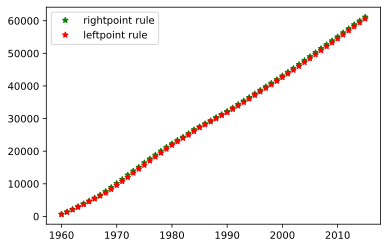

In [139]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'
plt.plot(x, right, 'g*', label='rightpoint rule')
plt.plot(x, left, 'r*', label='leftpoint rule')
plt.legend()

In [134]:
right[-1]

61134.22593000766

In [140]:
left[-1]

60608.83982531862

# Trapezoidal rule

The trapezoidal rule approximates the function as linear over the interval.

In [152]:
def trapezoidal_rule(f, a, b, n=101):
    x = np.linspace(a, b, n)
    dx = (b-a)/(n-1)
    area = 0
    for i in range(n-1):
        area += (x[i+1]-x[i])*(f(x[i+1])+f(x[i]))/2
    return area

In [153]:
f = lambda x: 1 + 0.5 * np.sin(1.75*np.pi*x)**2

In [155]:
trapezoidal_rule(f, 0, 1, n=1001)

1.2727361913667723

In [186]:
x = np.arange(1960,2017)

In [188]:
def trapezoidal_discrete(data, x_values):
    area = 0
    areas = []
    n = len(data)
    for i in range(n-1):
        area += (x[i+1]-x[i])*(data[i+1]+data[i])/2
        areas.append(area)
    return area, areas

In [189]:
area, areas = trapezoidal_discrete(climate_data, x)

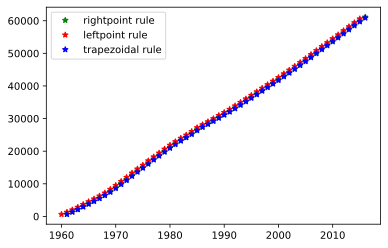

In [191]:
plt.plot(x[1:], right, 'g*', label='rightpoint rule')
plt.plot(x[:-1], left, 'r*', label='leftpoint rule')
plt.plot(x[1:], areas, 'b*', label='trapezoidal rule')
plt.legend()

In [192]:
q = np.trapz(climate_data,x[:])

In [193]:
q

60871.532877663136

In [195]:
areas[-1]

60871.532877663165

In [196]:
fexp = lambda x: np.exp(x)

In [197]:
def fwd_diff(f, x0, h):
    return (f(x0+h)-f(x0))/h

In [198]:
h_range = np.logspace(-5, 0, 6)
h_range

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])

In [200]:
true_error = [abs(fexp(2)-fwd_diff(fexp,2,h)) for h in h_range]

Text(0, 0.5, 'true error')

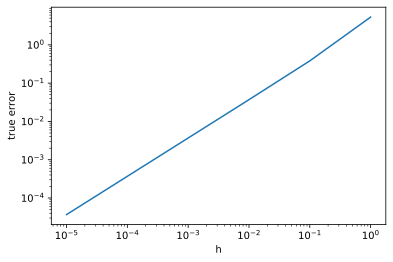

In [202]:
plt.loglog(h_range, true_error)
plt.xlabel('h')
plt.ylabel('true error')

In [238]:
def numerical_derivative(data, x):
    n = len(data)
    diffs = []
    for i in range(n):
        if i == 0:
            diffs.append((data[i+1]-data[i])/(x[i+1]-x[i]))
        elif i == n-1:
            diffs.append((data[i]-data[i-1])/(x[i]-x[i-1]))
        else:
            diffs.append((data[i+1]-data[i-1])/(x[i+1]-x[i-1]))
    return diffs

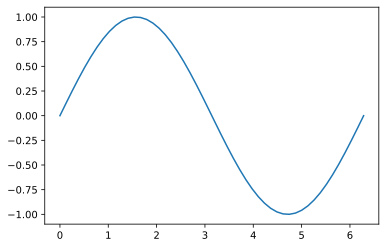

In [239]:
x = np.linspace(0, 2*np.pi)
fsin = lambda x: np.sin(x)
plt.plot(x, fsin(x))

In [240]:
dfsin = numerical_derivative(fsin(x), x)

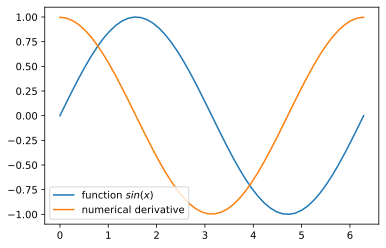

In [242]:
plt.plot(x, fsin(x), label='function $sin(x)$')
plt.plot(x, dfsin, label='numerical derivative')
plt.legend()